In [733]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


In [734]:
# Load and clean data
df = pd.read_csv("Sepsis_Cases_Log.csv")
df = df[df.groupby('Case ID')['Activity'].transform('first') == 'ER Registration']


In [735]:
df = df.drop(columns=['org:group', 'Variant', 'Variant index', 'Diagnose', 'lifecycle:transition'])

In [736]:
df['Complete Timestamp'] = df['Complete Timestamp'].apply(
    lambda x: int(x.split(':')[0]) * 60 + float(x.split(':')[1])
)

In [737]:
df.head()

,Case ID,Activity,Complete Timestamp,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,...,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,941.0,True,True,True,True,True,True,True,...,True,False,False,True,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,1620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,1620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,1620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [738]:
df[['Leucocytes', 'CRP', 'LacticAcid']] = df[['Leucocytes', 'CRP', 'LacticAcid']].fillna(0)

In [739]:
df.head()

,Case ID,Activity,Complete Timestamp,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,...,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,941.0,True,True,True,True,True,True,True,...,True,False,False,True,False,True,True,0.0,0.0,0.0
1,A,Leucocytes,1620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,0.0,0.0
2,A,CRP,1620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.0,0.0
3,A,LacticAcid,1620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.2
4,A,ER Triage,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


: 

In [710]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [711]:
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_columns)

Columns with missing values: ['InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion', 'DiagnosticArtAstrup', 'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid', 'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG']


In [712]:
df[missing_columns] = df[missing_columns].fillna(False)

C:\Users\hskma\AppData\Local\Temp\ipykernel_14972\1812025235.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[missing_columns] = df[missing_columns].fillna(False)


In [713]:
print(df.isnull().sum())

Case ID                      0
Activity                     0
Complete Timestamp           0
InfectionSuspected           0
DiagnosticBlood              0
DisfuncOrg                   0
SIRSCritTachypnea            0
Hypotensie                   0
SIRSCritHeartRate            0
Infusion                     0
DiagnosticArtAstrup          0
Age                          0
DiagnosticIC                 0
DiagnosticSputum             0
DiagnosticLiquor             0
DiagnosticOther              0
SIRSCriteria2OrMore          0
DiagnosticXthorax            0
SIRSCritTemperature          0
DiagnosticUrinaryCulture     0
SIRSCritLeucos               0
Oligurie                     0
DiagnosticLacticAcid         0
Hypoxie                      0
DiagnosticUrinarySediment    0
DiagnosticECG                0
Leucocytes                   0
CRP                          0
LacticAcid                   0
dtype: int64


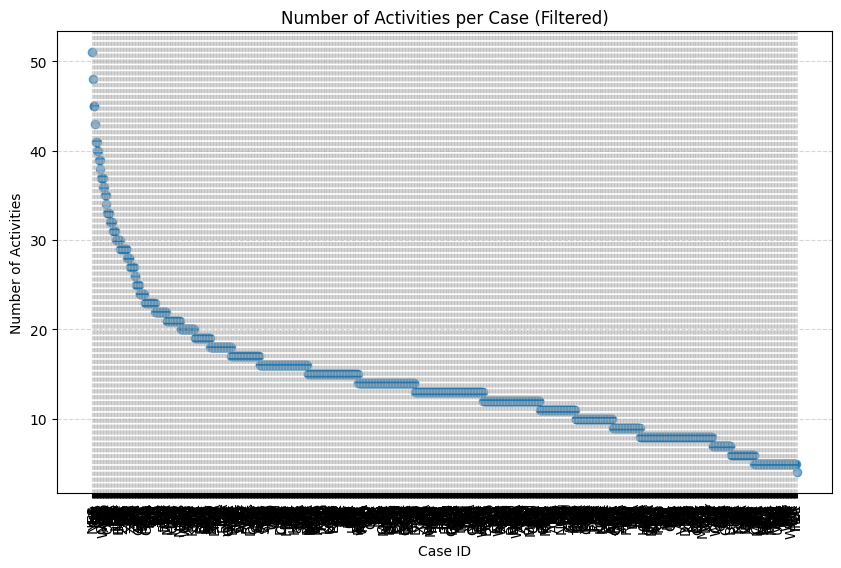

In [714]:
import matplotlib.pyplot as plt

# Count the number of activities (events) per case
case_counts = df["Case ID"].value_counts().reset_index()
case_counts.columns = ["Case ID", "Activity Count"]

# Filter out cases with more than 51 activities
filtered_cases = case_counts[case_counts["Activity Count"] <= 51]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_cases["Case ID"], filtered_cases["Activity Count"], alpha=0.6)
plt.xlabel("Case ID")
plt.ylabel("Number of Activities")
plt.title("Number of Activities per Case (Filtered)")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [715]:
# Count the number of activities per case
case_counts = df["Case ID"].value_counts()

# Filter out cases with more than 51 activities
valid_cases = case_counts[case_counts <= 51].index
df = df[df["Case ID"].isin(valid_cases)]


In [716]:
df['Activity_Sequence'] = df.groupby('Case ID').cumcount() + 1

In [717]:
df['Time_Diff'] = df.groupby('Case ID')['Complete Timestamp'].diff().fillna(0)

In [718]:
patient_features = df.groupby('Case ID').agg({
    'Age': 'first',  # Age is constant for each patient
    'InfectionSuspected': 'max',  # True if any activity has True
    'DiagnosticBlood': 'max',
    'DisfuncOrg': 'max',
    # Add other patient-specific attributes here
}).reset_index()

In [719]:
blood_tests = df.groupby('Case ID').agg({
    'Leucocytes': 'max',
    'CRP': 'max',
    'LacticAcid': 'max'
}).reset_index()

In [720]:
df = df.merge(patient_features, on='Case ID', how='left')
df = df.merge(blood_tests, on='Case ID', how='left')

In [721]:
df = df.drop(columns=[col for col in df.columns if col.endswith('_x')])

In [722]:
df = df.rename(columns={col: col.replace('_y', '') for col in df.columns if col.endswith('_y')})

In [723]:
# Next Activity
df['Next_Activity'] = df.groupby('Case ID')['Activity'].shift(-1)

# Total Time Remaining
df['Total_Time_Remaining'] = df.groupby('Case ID')['Complete Timestamp'].transform(lambda x: x.max() - x)

In [724]:
df = df.dropna(subset=['Next_Activity'])

In [725]:
df = pd.get_dummies(df, columns=['Activity'], prefix='Activity')

In [726]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [727]:
# Features (X)
X = df.drop(columns=['Case ID', 'Complete Timestamp', 'Next_Activity', 'Total_Time_Remaining'])

# Target (y)
y_next_activity = df['Next_Activity']
y_total_time = df['Total_Time_Remaining']

In [728]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_next_activity_train, y_next_activity_test, y_total_time_train, y_total_time_test = train_test_split(
    X, y_next_activity, y_total_time, test_size=0.2, random_state=42
)

In [730]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (Next_Activity)
label_encoder = LabelEncoder()
y_next_activity_train_encoded = label_encoder.fit_transform(y_next_activity_train)
y_next_activity_test_encoded = label_encoder.transform(y_next_activity_test)

In [731]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model.fit(X_train, y_next_activity_train_encoded)

RandomForestClassifier(random_state=42)

In [732]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_next_activity_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_next_activity_test_encoded, y_next_activity_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_next_activity_test_encoded, y_next_activity_pred, target_names=label_encoder.classes_))

Accuracy: 0.533143554290362
                  precision    recall  f1-score   support

    Admission IC       1.00      0.04      0.08        24
    Admission NC       0.64      0.61      0.62       222
             CRP       0.43      0.51      0.47       559
ER Sepsis Triage       0.80      0.83      0.82       184
       ER Triage       0.91      0.94      0.92       209
  IV Antibiotics       0.56      0.65      0.61       133
       IV Liquid       0.50      0.45      0.47       142
      LacticAcid       0.38      0.27      0.32       218
      Leucocytes       0.42      0.46      0.44       573
       Release A       0.24      0.12      0.16       124
       Release B       0.00      0.00      0.00        11
       Release C       0.00      0.00      0.00         3
       Release D       0.00      0.00      0.00         5
       Release E       0.00      0.00      0.00         2
       Return ER       0.98      0.98      0.98        50

        accuracy                          

f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)